In [1]:
import torch
from google.colab import drive

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
drive.mount('/content/drive')

Using device: cpu
Mounted at /content/drive


# Load Dataset

In [2]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.CIFAR10(root='./data', train=False, transform=transform, download=True)

BATCH_SZ = 512
train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SZ, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=BATCH_SZ, shuffle=False)

x_sample, y_sample = next(iter(train_loader))
print()
print(f"Batch Shape: {tuple(x_sample.shape)}")
print(f"Label Shape: {tuple(y_sample.shape)}")

100%|██████████| 170M/170M [00:03<00:00, 44.5MB/s]



Batch Shape: (512, 3, 32, 32)
Label Shape: (512,)


<Figure size 2000x400 with 0 Axes>

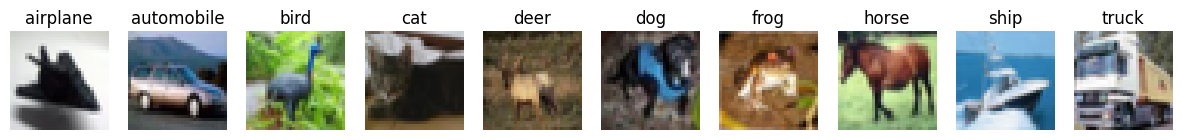

In [ ]:
import matplotlib.pyplot as plt


figure = plt.figure(figsize=(20, 4))
cols, rows = 10, 1

classes = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
images_to_plot = {}
for img, label in train_dataset:
  if label not in images_to_plot: images_to_plot[label] = img
  if len(images_to_plot) == len(classes): break

fig, axes = plt.subplots(1, len(images_to_plot), figsize=(15, 2))
for i, (ax, label) in enumerate(zip(axes, classes)):
  ax.imshow(images_to_plot[i].permute(1, 2, 0))
  ax.set_title(label)
  ax.axis("off")

plt.show()

# The NN

In [3]:
import torch.nn as nn


class Net3x3(nn.Sequential):
  def __init__(self):
    super(Net3x3, self).__init__(
      nn.Conv2d(3, 32, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2, 2),
      nn.Conv2d(32, 64, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2, 2),
      nn.Conv2d(64, 128, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2, 2),
      nn.Flatten(),
      nn.Linear(128 * 4 * 4, 1024), nn.ReLU(),
      nn.Linear(1024, 512), nn.ReLU(),
      nn.Dropout(0.5),
      nn.Linear(512, 10)
    )
  def last_conv(self): return self[6]

class Net3x3Norm(nn.Sequential):
  def __init__(self):
    super(Net3x3Norm, self).__init__(
      nn.Conv2d(3, 32, 3, padding=1), nn.BatchNorm2d(32), nn.ReLU(), nn.MaxPool2d(2, 2),
      nn.Conv2d(32, 64, 3, padding=1), nn.BatchNorm2d(64), nn.ReLU(), nn.MaxPool2d(2, 2),
      nn.Conv2d(64, 128, 3, padding=1), nn.BatchNorm2d(128), nn.ReLU(), nn.MaxPool2d(2, 2),
      nn.Flatten(),
      nn.Linear(128 * 4 * 4, 1024), nn.BatchNorm1d(1024), nn.ReLU(),
      nn.Linear(1024, 512), nn.BatchNorm1d(512), nn.ReLU(),
      nn.Dropout(0.5),
      nn.Linear(512, 10)
    )
  def last_conv(self): return self[9]

class Net5x5(nn.Sequential):
  def __init__(self):
    super(Net5x5, self).__init__(
      nn.Conv2d(3, 32, 5, padding=2), nn.BatchNorm2d(32), nn.ReLU(), nn.MaxPool2d(2, 2),
      nn.Conv2d(32, 64, 5, padding=2), nn.BatchNorm2d(64), nn.ReLU(), nn.MaxPool2d(2, 2),
      nn.Conv2d(64, 128, 5, padding=2), nn.BatchNorm2d(128), nn.ReLU(), nn.MaxPool2d(2, 2),
      nn.Flatten(),
      nn.Linear(128 * 4 * 4, 1024), nn.BatchNorm1d(1024), nn.ReLU(),
      nn.Linear(1024, 512), nn.BatchNorm1d(512), nn.ReLU(),
      nn.Dropout(0.5),
      nn.Linear(512, 10)
    )
  def last_conv(self): return self[9]

class Net2x3x3(nn.Sequential):
  def __init__(self):
    super(Net2x3x3, self).__init__(
        nn.Conv2d(3, 32, 3, padding=1), nn.BatchNorm2d(32), nn.ReLU(),
        nn.Conv2d(32, 64, 3, padding=1), nn.BatchNorm2d(64), nn.ReLU(), nn.MaxPool2d(2, 2),
        nn.Conv2d(64, 128, 3, padding=1), nn.BatchNorm2d(128), nn.ReLU(),
        nn.Conv2d(128, 128, 3, padding=1), nn.BatchNorm2d(128), nn.ReLU(), nn.MaxPool2d(2, 2),
        nn.Conv2d(128, 256, 3, padding=1), nn.BatchNorm2d(256), nn.ReLU(),
        nn.Conv2d(256, 256, 3, padding=1), nn.BatchNorm2d(256), nn.ReLU(), nn.MaxPool2d(2, 2),
        nn.Flatten(),
        nn.Linear(256 * 4 * 4, 1024), nn.BatchNorm1d(1024), nn.ReLU(),
        nn.Linear(1024, 512), nn.BatchNorm1d(512), nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(512, 10)
    )
  def last_conv(self): return self[18]

class Net2x3x3Normless(nn.Sequential):
  def __init__(self):
    super(Net2x3x3Normless, self).__init__(
      nn.Conv2d(3, 32, 3, padding=1), nn.ReLU(),
      nn.Conv2d(32, 64, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2, 2),
      nn.Conv2d(64, 128, 3, padding=1), nn.ReLU(),
      nn.Conv2d(128, 128, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2, 2),
      nn.Conv2d(128, 256, 3, padding=1), nn.ReLU(),
      nn.Conv2d(256, 256, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2, 2),
      nn.Flatten(),
      nn.Linear(256 * 4 * 4, 1024), nn.ReLU(),
      nn.Linear(1024, 512), nn.ReLU(),
      nn.Dropout(0.5),
      nn.Linear(512, 10)
    )
  def last_conv(self): return self[12]

model = Net2x3x3().to(device)
print(model)
print(f"Last Layer: {model.last_conv()}")

Net2x3x3(
  (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): ReLU()
  (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (9): ReLU()
  (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): ReLU()
  (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (14): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): BatchNorm2d(256, eps=1e-05, momentum=0

Epoch 1/200, Loss: 1.1576, Accuracy: 58.60%
Epoch 2/200, Loss: 0.6978, Accuracy: 75.44%
Epoch 3/200, Loss: 0.5115, Accuracy: 82.28%
Epoch 4/200, Loss: 0.3870, Accuracy: 86.57%
Epoch 5/200, Loss: 0.2807, Accuracy: 90.26%
Epoch 6/200, Loss: 0.1995, Accuracy: 93.07%
Epoch 7/200, Loss: 0.1441, Accuracy: 94.99%
Epoch 8/200, Loss: 0.0973, Accuracy: 96.70%
Epoch 9/200, Loss: 0.0729, Accuracy: 97.54%
Epoch 10/200, Loss: 0.0578, Accuracy: 98.06%
Epoch 11/200, Loss: 0.0519, Accuracy: 98.28%
Epoch 12/200, Loss: 0.0440, Accuracy: 98.52%
Epoch 13/200, Loss: 0.0416, Accuracy: 98.59%
Epoch 14/200, Loss: 0.0385, Accuracy: 98.68%
Epoch 15/200, Loss: 0.0275, Accuracy: 99.10%
Epoch 16/200, Loss: 0.0263, Accuracy: 99.16%
Epoch 17/200, Loss: 0.0242, Accuracy: 99.22%
Epoch 18/200, Loss: 0.0329, Accuracy: 98.89%
Epoch 19/200, Loss: 0.0366, Accuracy: 98.70%
Epoch 20/200, Loss: 0.0298, Accuracy: 99.02%
Epoch 21/200, Loss: 0.0236, Accuracy: 99.23%
Epoch 22/200, Loss: 0.0255, Accuracy: 99.12%
Epoch 23/200, Loss:

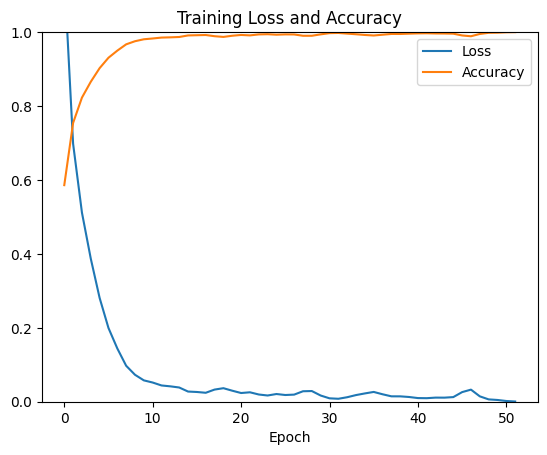

In [ ]:
import torch.optim as optim
import time


EPOCHS = 200
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

loss_history = []
acc_history = []

start_time = time.time()
model.train()
for epoch in range(EPOCHS):
  running_loss = 0.0
  correct = 0
  total = 0

  for i, (images, labels) in enumerate(train_loader):
    images = images.to(device)
    labels = labels.to(device)

    outputs = model(images)
    loss = criterion(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    running_loss += loss.item()

    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

  epoch_acc = correct / total
  epoch_loss = running_loss / len(train_loader)
  loss_history.append(epoch_loss)
  acc_history.append(epoch_acc)
  print(f"Epoch {epoch+1}/{EPOCHS}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc*100:.2f}%")
  if epoch_loss < 0.001: break


if device.type == 'cuda': torch.cuda.synchronize()
end_time = time.time()
train_time = end_time - start_time
print(f"Training time: {train_time:.2f} seconds")

plt.plot(loss_history, label='Loss')
plt.plot(acc_history, label='Accuracy')
plt.xlabel('Epoch')
plt.title('Training Loss and Accuracy')
plt.ylim(0, 1.0)
plt.legend()
plt.savefig(f'/content/drive/MyDrive/CIFAR10_{model.__class__.__name__}.png')
plt.show()

In [5]:
import numpy as np


model.eval()
all_preds = []
all_labels = []
all_probs = []

with torch.no_grad():
  correct = 0
  total = 0
  for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)

    outputs = model(images)

    probs = nn.functional.softmax(outputs, dim=1)

    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

    all_preds.extend(predicted.cpu().numpy())
    all_labels.extend(labels.cpu().numpy())
    all_probs.extend(probs.cpu().numpy())

accuracy = correct / total * 100
print(f"Test Accuracy: {accuracy:.2f}%")
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)
all_probs = np.array(all_probs)

Test Accuracy: 85.62%


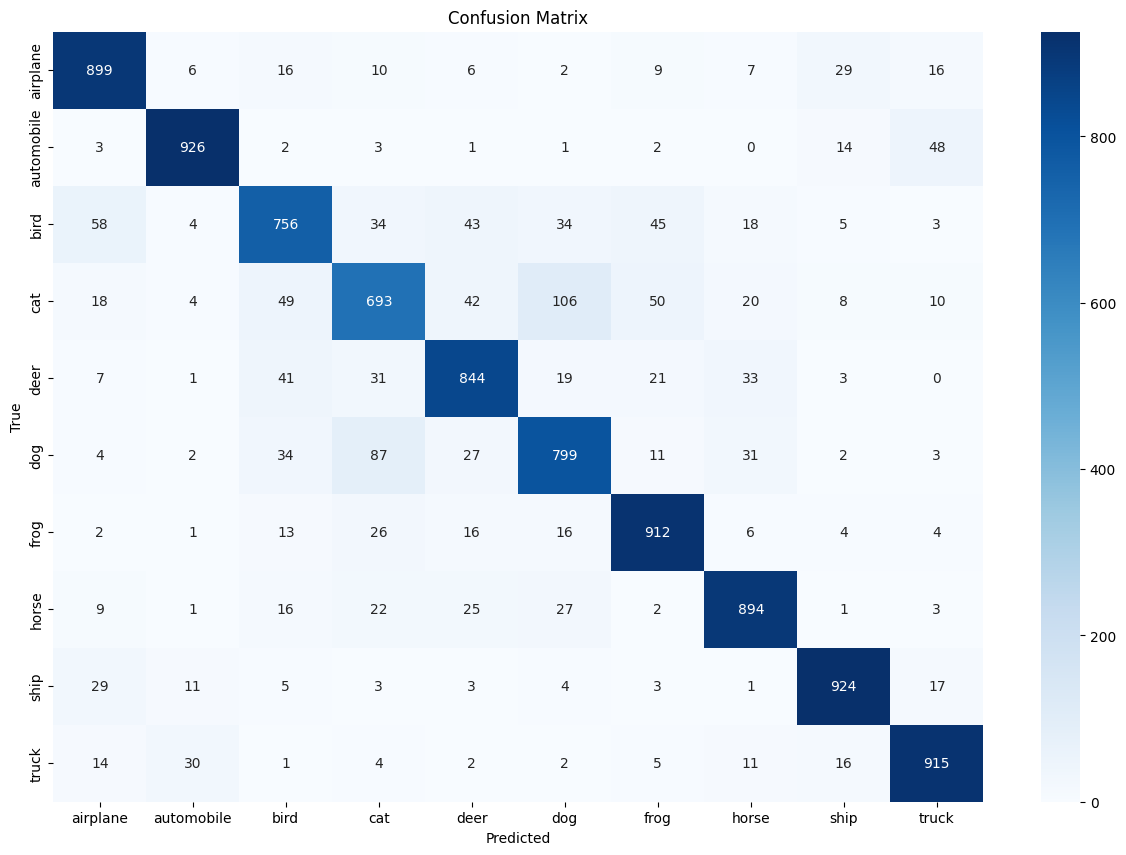

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion_mat = confusion_matrix(all_labels, all_preds)
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(confusion_mat, annot=True, fmt='d', ax=ax, cmap="Blues", xticklabels=classes, yticklabels=classes)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
plt.show()

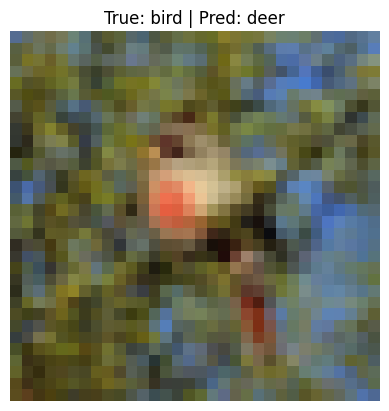

In [ ]:
indices = np.random.choice(len(test_dataset))
x_sample_img, y_sample_true = test_dataset[indices]
y_sample_pred = all_preds[indices]

plt.title(f"True: {classes[y_sample_true]} | Pred: {classes[y_sample_pred]}")
plt.imshow(x_sample_img.permute(1, 2, 0))
plt.axis('off')
plt.show()

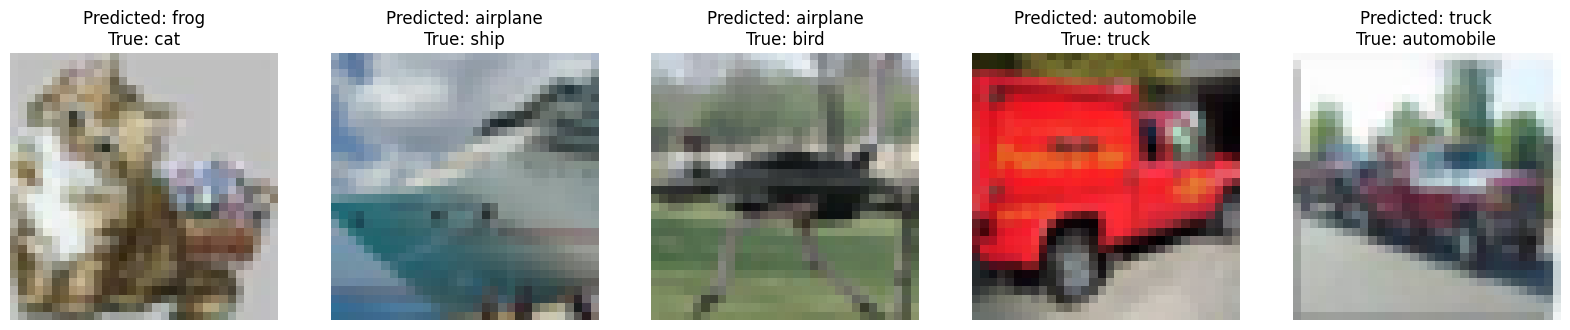

In [ ]:
errors = (all_preds != all_labels)
error_preds = all_preds[errors]
error_probs = all_probs[errors]
error_labels = all_labels[errors]
error_samples = [test_dataset[i][0] for i in np.where(errors)[0]]

error_pred_probs = np.max(error_probs, axis=1)
error_label_probs = np.diagonal(np.take(error_probs, error_labels, axis=1))
diffs = error_pred_probs - error_label_probs
top_indices = np.argsort(diffs)[-5:]

fig, axes = plt.subplots(1, len(top_indices), figsize=(20, 20))
for idx, ax in zip(top_indices, axes):
  ax.imshow(error_samples[idx].permute(1, 2, 0))
  ax.set_title(f"Predicted: {classes[error_preds[idx]]}\nTrue: {classes[error_labels[idx]]}")
  ax.axis('off')
plt.show()

In [ ]:
with open('/content/drive/MyDrive/CIFAR10_notes.txt', 'a') as f:
  f.write(
    f"{model.__class__.__name__}: "
    f"trained in {train_time:.2f}s, "
    f"accuracy: {accuracy:.2f}%\n"
  )

file = f'/content/drive/MyDrive/CIFAR10_{model.__class__.__name__}.pth'
torch.save(model.state_dict(), file)
print(f'{file} is saved.')

/content/drive/MyDrive/CIFAR10_Net2x3x3.pth is saved.


# Demo

In [4]:
file = f'/content/drive/MyDrive/CIFAR10_{model.__class__.__name__}.pth'
model.load_state_dict(torch.load(file, map_location=device))
model.eval()

Net2x3x3(
  (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): ReLU()
  (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (9): ReLU()
  (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): ReLU()
  (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (14): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): BatchNorm2d(256, eps=1e-05, momentum=0

In [ ]:
import cv2


class GradCAM:
  def save_feature_maps(self, module, input, output): self.feature_maps = output
  def save_gradients(self, module, grad_input, grad_output): self.gradients = grad_output[0]

  def __init__(self):
    self.feature_maps = None
    self.gradients = None
    last_conv = model.last_conv()
    last_conv.register_forward_hook(self.save_feature_maps)
    last_conv.register_full_backward_hook(self.save_gradients)

  def generate_cam(self, input_tensor):
    output = model(input_tensor)
    target_class = output.argmax(dim=1).item()

    model.zero_grad()
    target = output[0][target_class]
    target.backward()

    gradients = self.gradients[0]
    activations = self.feature_maps[0]
    weights = torch.mean(gradients, dim=(1, 2))
    cam = (weights[:, None, None] * activations).sum(dim=0)
    cam = torch.relu(cam)

    cam = cam.cpu().detach().numpy()
    cam = cv2.resize(cam, (128, 128))
    cam = cv2.normalize(cam, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    return cam

grad_cam = GradCAM()

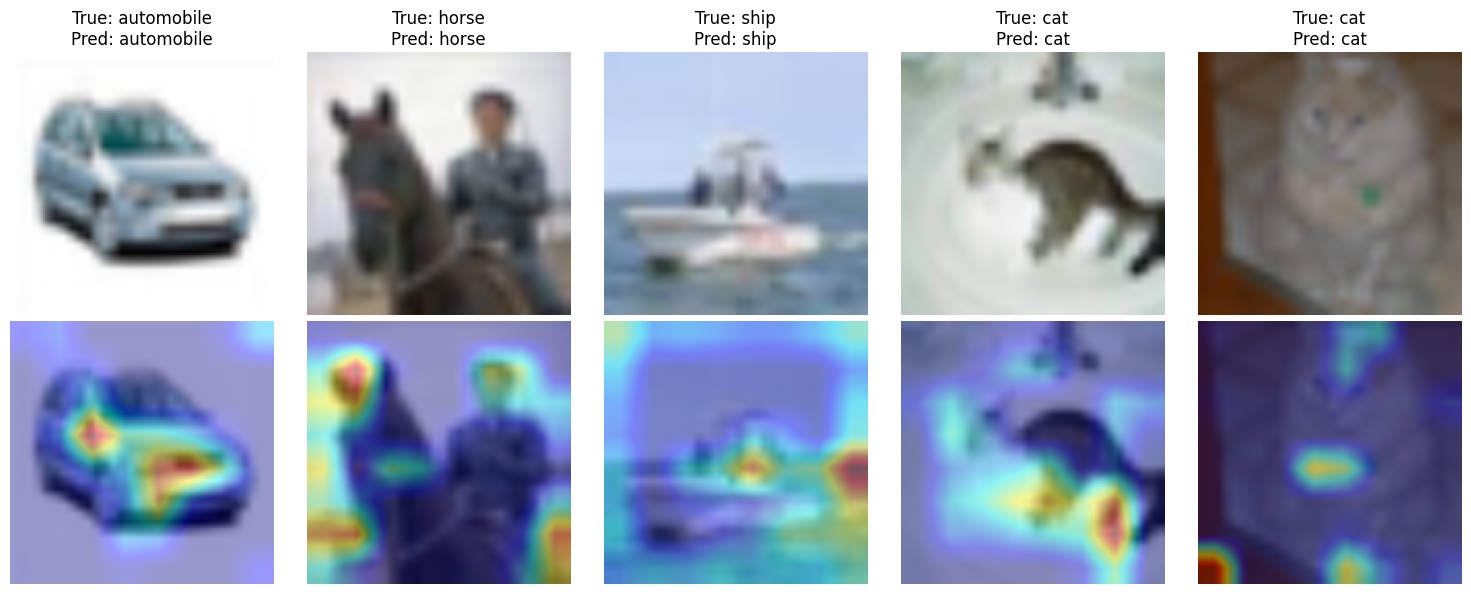

In [ ]:
def visualize_gradcam(indices):
  if len(indices) != 5:
    print("visualize_gradcam requires exactly 5 indices for nice layout")

  fig, axes = plt.subplots(2, len(indices), figsize=(15, 6))
  for i, idx in enumerate(indices):
    img_tensor, label_idx = test_dataset[idx]
    input_tensor = img_tensor.unsqueeze(0).to(device)
    cam = grad_cam.generate_cam(input_tensor)

    with torch.no_grad():
      output = model(input_tensor)
      pred_idx = output.argmax(dim=1).item()

    img_display = img_tensor.permute(1, 2, 0).cpu().numpy()
    img_display = cv2.resize(img_display, (128, 128))

    heatmap_uint8 = np.uint8(255 * cam)
    heatmap = cv2.applyColorMap(heatmap_uint8, cv2.COLORMAP_JET)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)
    heatmap = np.float32(heatmap) / 255.0
    overlay = np.clip(heatmap * 0.4 + img_display * 0.6, 0, 1)

    ax = axes[0, i]
    ax.imshow(img_display)
    ax.set_title(f"True: {classes[label_idx]}\nPred: {classes[pred_idx]}")
    ax.axis('off')

    ax = axes[1, i]
    # ax.imshow(cam, cmap='jet')
    ax.imshow(overlay)
    ax.axis('off')

  plt.tight_layout()
  plt.show()

visualize_gradcam(np.random.choice(len(test_dataset), 5, replace=False))

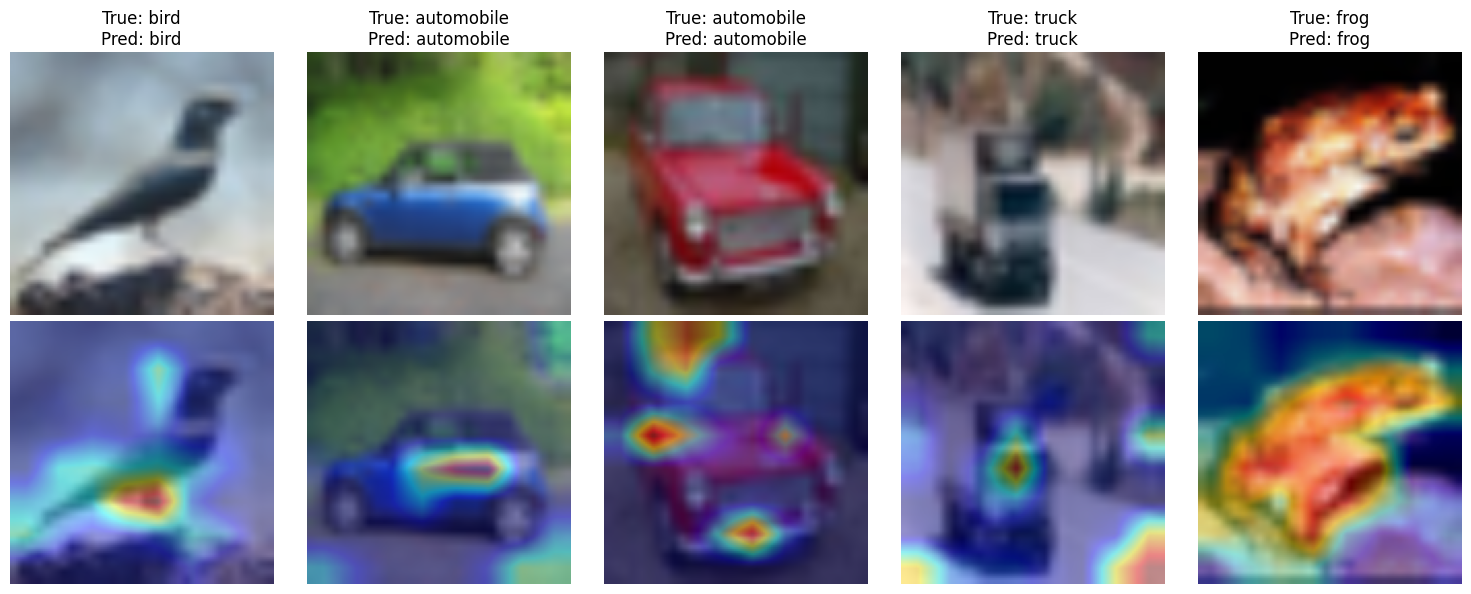

In [ ]:
visualize_gradcam(top_indices)

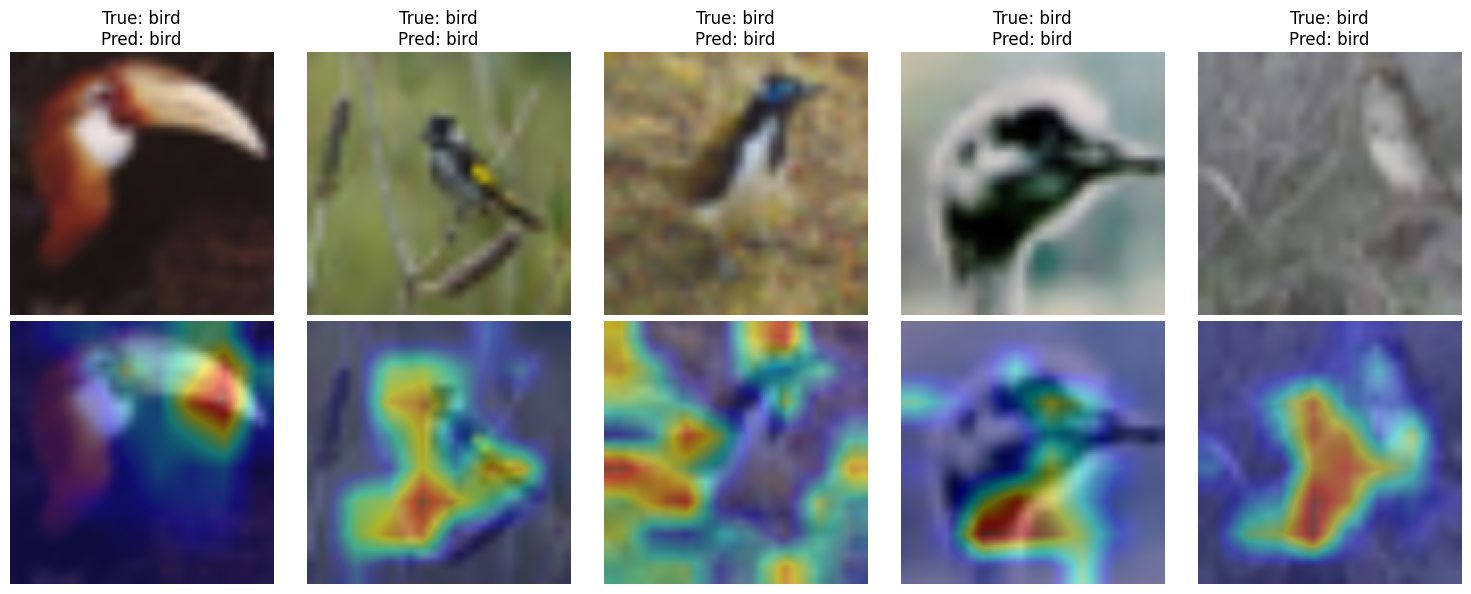

In [ ]:
# classes = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
def get_5_indices(label_class):
  correct_indices = np.where((all_labels == classes.index(label_class)))[0]
  return np.random.choice(correct_indices, 5, replace=False)

visualize_gradcam(get_5_indices("bird"))